In [1]:
# Importar modelo
from mmq_high_precision import MMQRegressor
# import mmq_high_precision as mmq

#### Exemplos de uso - mmq-high-precision
##### Biblioteca -> treinamento -> teste -> gráficos -> R² -> Derivadas (maximizar e minimizar) -> Extrair função -> Integrais -> Teste intenso

In [2]:
# Dados para teste

temperatura = [
    0, 2, 4, 6, 8, 10,
    12, 14, 16, 18, 20, 22,
    24, 26, 28, 30, 32, 34,
    36, 38, 40, 42, 44, 46,
    48, 50, 52, 54, 56, 58
]

tensao = [
    0.52, 0.55, 0.57, 0.60, 0.63, 0.66,
    0.70, 0.72, 0.75, 0.79, 0.82, 0.84,
    0.87, 0.91, 0.94, 0.97, 1.01, 1.04,
    1.07, 1.10, 1.14, 1.17, 1.20, 1.23,
    1.27, 1.30, 1.33, 1.36, 1.40, 1.43
]


##### A classe MMQRegressor requer apenas o Grau do polinômio, caso não passe a precisão desejada, ela mantêm 50 de precisão.

In [21]:
sensor = MMQRegressor(grau=1, precision=40)

#### O método fit(x,y) treina o modelo e retorna os coeficientes do polinômio encontrado. No caso, sendo do primeiro grau: aX + b

In [ ]:
sensor.fit(tensao,temperatura) #  63.10X - 31.77

[mpf('63.10643032229182998387052692075036102130279'),
 mpf('-31.77149240036703122532028492337075337333299')]

#### O método predict(x) serve para apenas testar a função encontrada. Ele retorna os valores de f(x) do polinômio encontrado.

In [23]:
sensor.predict(tensao)

[mpf('1.043851367224721487287780206803878421033181'),
 mpf('2.937044276893478068296982711503055346604979'),
 mpf('4.199172883339308782748589810149731234765984'),
 mpf('6.092365793008065363757792314848908160337782'),
 mpf('7.98555870267682194476699481954808508590958'),
 mpf('9.878751612345578525776197324247262011482112'),
 mpf('12.40300882523724696090060609269338918335789'),
 mpf('13.66513743168308468157340776249284046707194'),
 mpf('15.55833034135184126258261026719201739264447'),
 mpf('18.08258755424351670392821360679091996007329'),
 mpf('19.97578046391226627871622154033732149009205'),
 mpf('21.23790907035810399938902321013677277380609'),
 mpf('23.13110198002686058039822571483594969937862'),
 mpf('25.65535919291853602174382905443485226680744'),
 mpf('27.5485521025872855965318369879812537968262'),
 mpf('29.441745012256042177541039492680430722398'),
 mpf('31.96600222514771761888664283227933328982682'),
 mpf('33.85919513481647419989584533697851021539935'),
 mpf('35.75238804448523078090504

#### O método plotar é para ver graficamente os pontos e a função ajustada. Você pode:

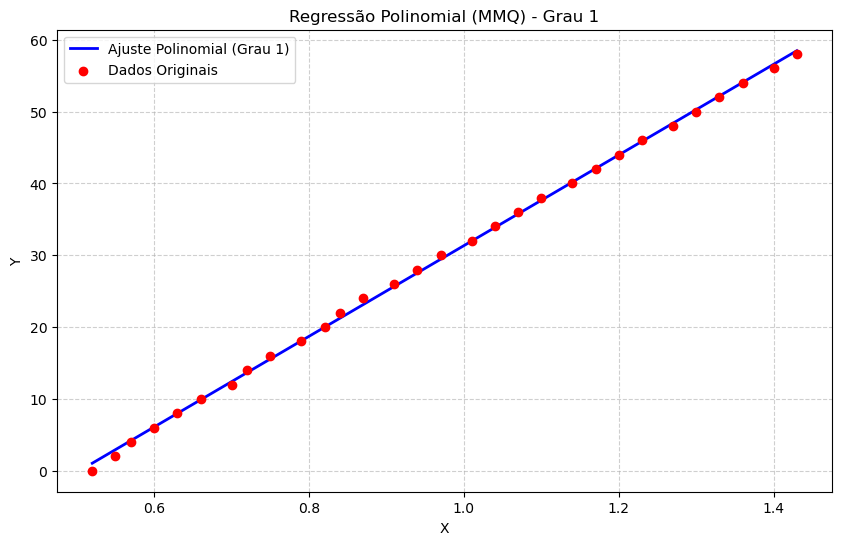

In [24]:
## Plotar a função ajustada e os pontos dos dados originais

sensor.plotar(x=tensao,y=temperatura)

#### Pode plotar em intervalos a função encontrada

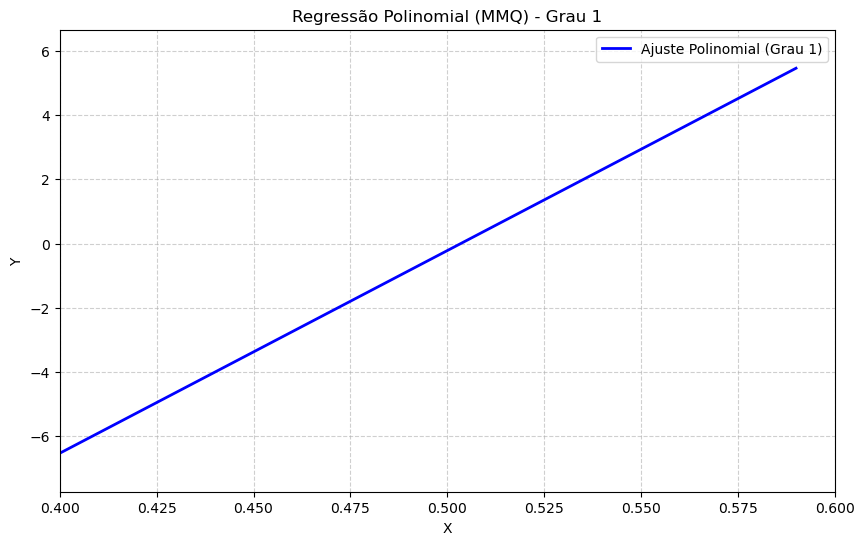

In [26]:
sensor.plotar(a=0.4,b=0.6)

#### Pode plotar a função com uma lista de dados para calcular a f(x)

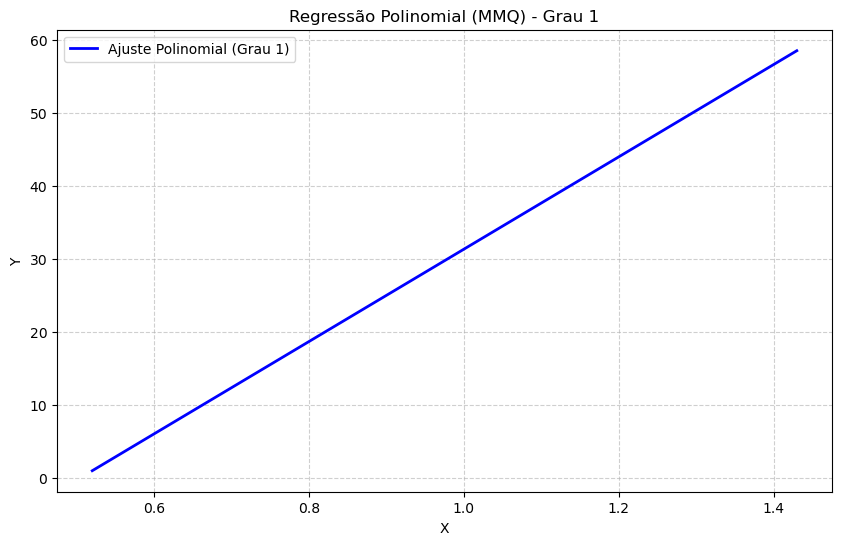

In [28]:
sensor.plotar(x=tensao)

#### O método avaliar ajuste retorna o R²

In [34]:
sensor.avaliar_ajuste(tensao,temperatura)

mpf('0.9993840361495756940706197289885502320733184')

## Demonstrar para funções quadráticas

In [40]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y = [16,9,4,1,0,1,4,9,16,25,36]

In [41]:
func_quadratica = MMQRegressor(grau=2, precision=40)

In [42]:
func_quadratica.fit(x,y)

[mpf('0.9999999999999995644471339534362624445826813'),
 mpf('1.999999999999999559549983033104789288403179'),
 mpf('1.000000000000003021211655102261315039123842')]

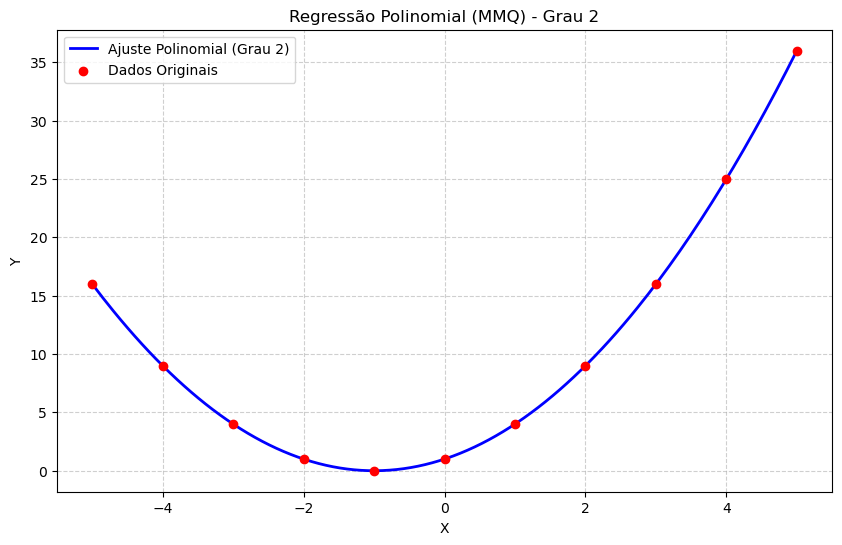

In [43]:
func_quadratica.plotar(x=x,y=y)

#### Encontrar ponto de mínimo da função em um intervalo

In [47]:
func_quadratica.minimizar(a=-10,b=10) ## Observe o e-15 ali em baixo, ele indica o valor da função e o -0.9999 indica o x o qua minimiza a função

(mpf('-0.999999999999999812649864594504833803512156'),
 mpf('3.026108806022592903978783116085090009079291e-15'))

## Encontrar máximos e mínimos

In [63]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y = [-16,-9,4,1,-10,1,4,9,16,25,36]

In [64]:
func_2 = MMQRegressor(grau=10)

In [65]:
func_2.fit(x,y)

[mpf('-0.00053791887368121286996679367804325793107810620216115711'),
 mpf('0.00042438271605102318428839590451528335652196099420769373'),
 mpf('0.029580026585714260305804964259114743110468844460418692'),
 mpf('-0.024834656084736690981722564287249496335100674637677152'),
 mpf('-0.54337963196479921287420930612705920213313566530083131'),
 mpf('0.49363425926048239471843188832359696836388707168190928'),
 mpf('3.8081073794143058206263202469543861636277881061495092'),
 mpf('-3.6493827160554443851408341840458035419977338951210888'),
 mpf('-7.2937698779266312787166545652637540643863705171999402'),
 mpf('10.180158730164567310251358685220555627220323321648941'),
 mpf('1.0000000126514213280057276611818222810930778864399233')]

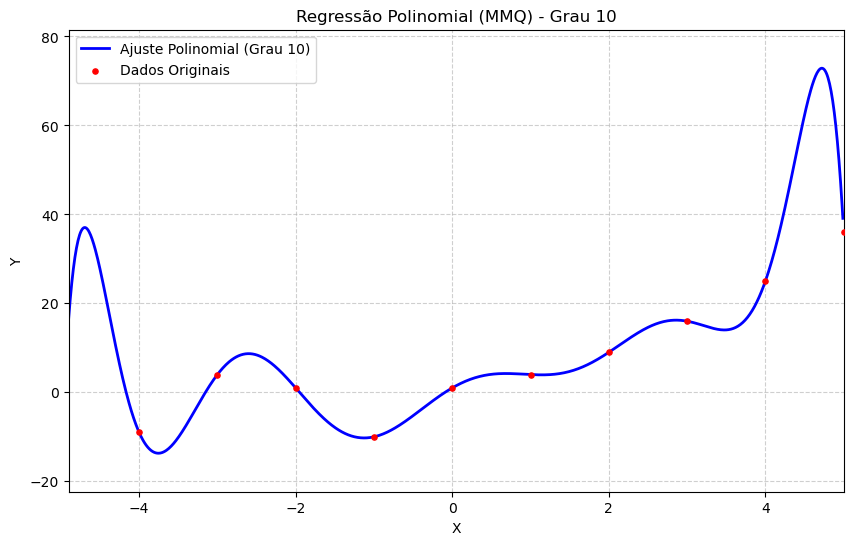

In [78]:
func_2.plotar(x=x,y=y, a=-4.9, b=5)

### Indica os máximos e mínimos globais e locais

In [75]:
func_2.max_min(a=-4.6,b=5)

{'global_max': (mpf('4.7216462595871422345049277150096440594757148086153863'),
  mpf('72.868131956970013452006171589315076384813506373460936')),
 'global_min': (mpf('-3.7536129858187628906332416846034618530171251507310563'),
  mpf('-13.685182352024743351999774436110860888478758461075693')),
 'maximos': [(mpf('-2.6009930127061666677230833280461213667766204753114276'),
   mpf('8.6995600131652316660906014548398061964216552914765842')),
  (mpf('0.68465516057505784518176146311843707564939348279690629'),
   mpf('4.2344381547872788803447349951817795191389948990137135')),
  (mpf('2.8601809174049417937339880883469967580380989323132626'),
   mpf('16.231569859057549872032269546691766330758070432841789')),
  (mpf('4.7216462595871422345049277150096440594757148086153863'),
   mpf('72.868131956970013452006171589315076384813506373460936'))],
 'minimos': [(mpf('-3.7536129858187628906332416846034618530171251507310563'),
   mpf('-13.685182352024743351999774436110860888478758461075693')),
  (mpf('-1.12525

## Pode solicitar a função encontrada

In [81]:
funcao = func_2.function()
type(funcao)

function

In [82]:
funcao(x)

[mpf('-16.000000000022870992336326280378682099928741622067435'),
 mpf('-8.9999999997089452821716534379660843316190537690292967'),
 mpf('3.9999999983941366048546125783439401942623791670662238'),
 mpf('1.0000000051270847835898770845085983661780469160712866'),
 mpf('-10.000000010114589947554500013789148177227147236219372'),
 mpf('1.0000000126514213280057276611818222810930778864399233'),
 mpf('3.999999989887249356508544428442081503988648332913209'),
 mpf('9.000000005112771973711946682055949273677085819195234'),
 mpf('15.999999998408279820558113461181356957668971230608936'),
 mpf('25.000000000285609440270473194579483035281296236973533'),
 mpf('35.999999999978020547563848712948850001564937312837872')]

## Integrais

In [83]:
x = [1,2,3,4,5,6,7,8,9,10]
y = x

In [94]:
f_afim = MMQRegressor(grau=1, precision=4)

In [95]:
f_afim.fit(x,y)

[mpf('1.0'), mpf('0.0')]

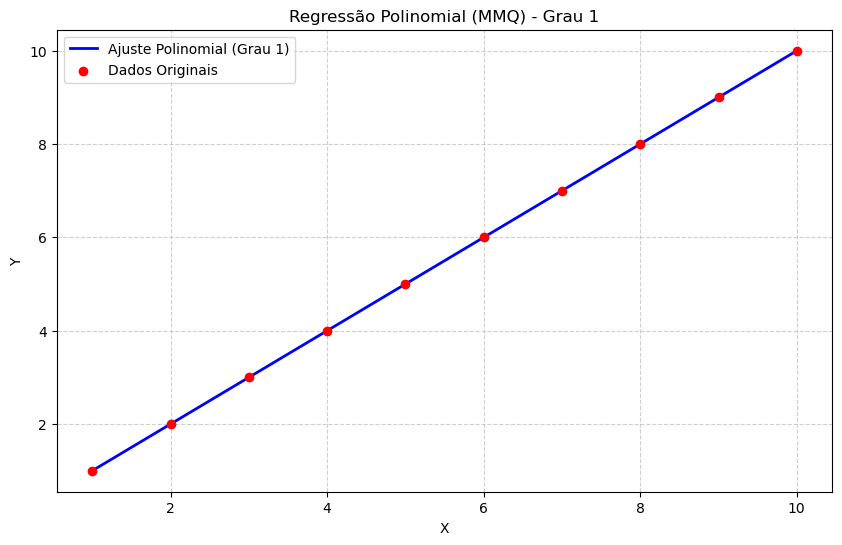

In [97]:
f_afim.plotar(x=x,y=y)

In [100]:
f_afim.integral(a=0,b=1)

mpf('0.5')

In [117]:
f_afim.integral(a=0,b=10)

mpf('50.0')

In [153]:
import numpy as np

# Geração de dados extremamente ruidosos
np.random.seed(42) 
n_pontos = 1000
std_dev_ruido = 15 

A = 20
B = 3.5
C = 0.5
D = 6
E = 10
F = 50

x = np.sort(np.random.uniform(0, 10, n_pontos))

Y_true = (A * np.sin(B * x) + 
          C * (x**3) - 
          D * (x**2) + 
          E * x + 
          F)

ruido = np.random.normal(0, std_dev_ruido, n_pontos)

y = Y_true + ruido


In [167]:
F = MMQRegressor(grau=100, precision=140)

In [168]:
F.fit(x,y)

[mpf('2.4087189596113196282943429573673655002300877776317074322394483751444824721215797489673546830332922983653711788170916117548713063297208277143203e-63'),
 mpf('-1.1833976589615031314219832613020086865418376201004720047797965248873018843544429212466529100886099470115887535127651969515710639978867940527875e-60'),
 mpf('2.8764730603958555160900350757114250347463726911293586482823015220552031220784628215746100193791704450292414596738588336838473622263272700161938e-58'),
 mpf('-4.6119252569650327824638653995231025960469082357486551328558691199690144213444069896707360224561132313896843171438523621115999147608890927723188e-56'),
 mpf('5.4867700041834062570155021236732958011122735777521351773843456890262836393079229818266284417699274222079041251451406568308982211705432984210958e-54'),
 mpf('-5.1660582092458756534994034361489664252644023306614114419060244128559127018561070441358333749459700391681879292241148415760968850655820663241334e-52'),
 mpf('4.00963189667520305740033983035880386397341

In [169]:
F.avaliar_ajuste(x,y)

mpf('0.75239911642001602984937087915917014238278873429617103365161417423619298902660871081601259185499848042475967286012242274882464732106328007157112')

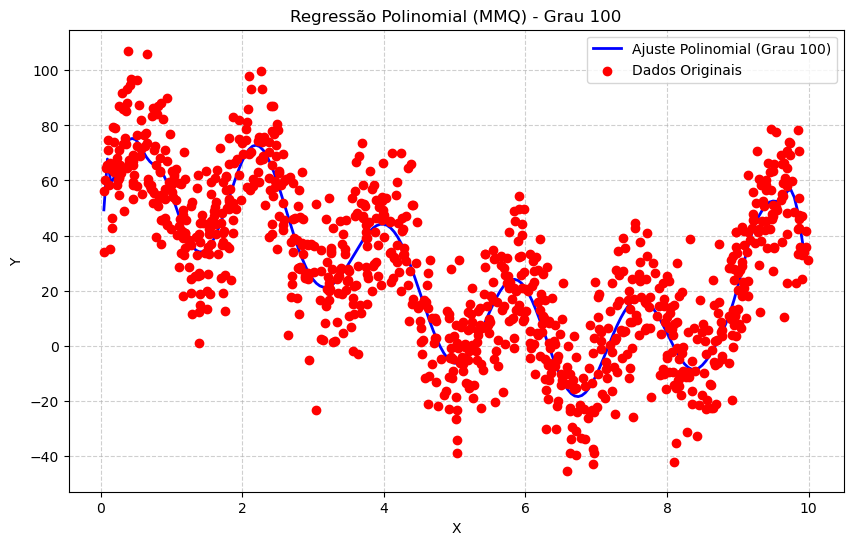

In [170]:
F.plotar(x=x,y=y)

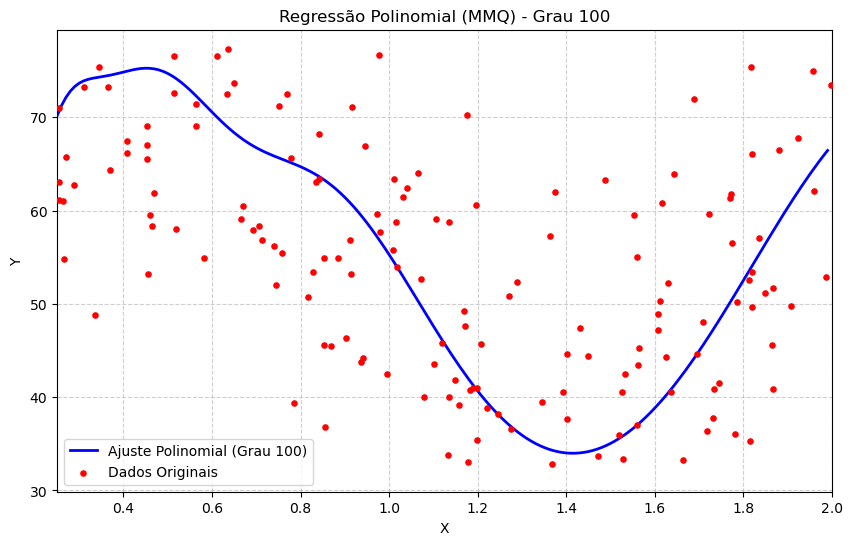

In [172]:
F.plotar(x=x,y=y, a=0.25,b=2)